In [3]:
#  데이터 불러옴
from tensorflow.keras.datasets import mnist

# the data, split between train and validation sets
# 훈련 데이터와 검증 데이터로 나눔
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

In [5]:
#MNIST 데이터 살펴보기
x_train.shape

(60000, 28, 28)

In [6]:
x_valid.shape

(10000, 28, 28)

In [7]:
x_train.dtype

dtype('uint8')

In [8]:
x_train.min()

0

In [9]:
x_train.max()

255

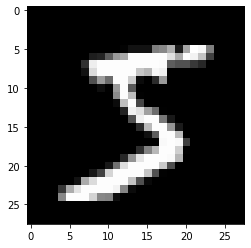

In [10]:
# matplotlib를 사용하면 데이터세트에서 이러한 회색조 이미지 중 하나를 렌더링 가능함

import matplotlib.pyplot as plt

image = x_train[0]
plt.imshow(image, cmap='gray')

In [11]:
# 픽셀의 정답을 알기 위해서는 정답인 y_train 데이터를 불러오면 된다

y_train[0]

5

In [12]:
# 1) 이미지 데이터 평탄화
# Reshape: 2차원 이미지 -> 단일 어레이

x_train = x_train.reshape(60000, 784)
x_valid = x_valid.reshape(10000, 784)

In [13]:
# 확인
x_train.shape

(60000, 784)

In [14]:
# 2) 이미지  데이터 정규화

x_train = x_train / 255
x_valid = x_valid / 255

In [16]:
# 3.1) 범주 인코딩

values = [
    [1, 0, 0],
    [0, 0, 1],
    [0, 1, 0],
    [0, 0, 1]
]

# 3.2) 레이블 범주 인코딩
import tensorflow.keras as keras
num_categories = 10

y_train = keras.utils.to_categorical(y_train, num_categories)
y_valid = keras.utils.to_categorical(y_valid, num_categories)

In [17]:
# 확인

y_train[0:0]

array([], shape=(0, 10), dtype=float32)

In [19]:
# 모델 생성
# 0) 모델 인스턴스화
from tensorflow.keras.models import Sequential

model = Sequential()

# 1) 입력 레이어 생성
from tensorflow.keras.layers import Dense
model.add(Dense(units=512, activation='relu', input_shape=(784,)))

# 2) 히든 레이어 생성
model.add(Dense(units = 512, activation='relu'))

#3) 출력 레이어 생성
model.add(Dense(units = 10, activation='softmax'))

# 모델 요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [20]:
# 모델 컴파일
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
# 모델 트레이닝
history = model.fit(
    x_train, y_train, epochs=5, verbose=1, validation_data=(x_valid, y_valid)
)

Epoch 1/5
1875/1875 [==============================] - 33s 17ms/step - loss: 0.1902 - accuracy: 0.9432 - val_loss: 0.1122 - val_accuracy: 0.9681
Epoch 2/5
1875/1875 [==============================] - 31s 17ms/step - loss: 0.1015 - accuracy: 0.9734 - val_loss: 0.1429 - val_accuracy: 0.9669
Epoch 3/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0858 - accuracy: 0.9796 - val_loss: 0.1140 - val_accuracy: 0.9779
Epoch 4/5
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0720 - accuracy: 0.9835 - val_loss: 0.1591 - val_accuracy: 0.9725
Epoch 5/5
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0633 - accuracy: 0.9864 - val_loss: 0.1525 - val_accuracy: 0.9758


In [22]:
# 메모리 지우기 (다음 노트북으로 넘어가기 위한 필수 작업)
import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'restart': True, 'status': 'ok'}